# Notes for 14 September - Scorched Earth!

First we answered some questions about reshape and using axis=

In [1]:
import numpy as np

A = np.arange(12)
A

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
B = np.reshape(A, (-1, 4))
B

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [4]:
np.mean(B, axis=0)

array([ 4.,  5.,  6.,  7.])

## On to the game!

We will talk through the code for a simple version of [**Scorched Earth**](http://en.wikipedia.org/wiki/Scorched_Earth_%28video_game%29).

In the game, you are given the position of your cannon and the position of a target. You have to determine the direction and speed of your rocket to hit the target. We'll do this in two dimensions.

We will need a little simple calculus to determine the position as a function of time given the initial position and velocity.

$A(t) = A $

$V(t) = \int_0^t A(t) dt = A t + V_0$

$P(t) = \int_0^t V(t) dt = {1 \over 2} A t^2 + V_0 t + P_0$

So, we can set up some variables.

The variables below are 1-D with 2 values. The first value (with index 0) is the component in the X coordinate system direction and the second value is the component in the Y coordinate direction. These are mathematical vectors.

In [5]:
%matplotlib inline
import numpy as np
import pylab

# A[0] is zero because gravity doesn't pull in the X axis direction
# A[1] is -9.8 because I'm assuming the acceleration due to gravity is 9.8 meters per second square in the negative Y direction
A = np.array([0.0, -9.8]) # acceleration due to gravity
# I pulled these velocities out of my ear
# V0[0] is 90 meters per second in the positive X direction (that is to the right).
# V0[1] is 50 meters per second up.
V0 = np.array([90, 50.0]) # initial velocity
# We are launching from 2 meters above the origin.
P0 = np.array([0.0, 2.0]) # initial position

In [5]:
# time in steps of 0.01 seconds starting at 0 and going to 15 seconds.
t = np.arange(0, 15, 0.01)

# I want a column vector. By that I mean a 2D object with N rows and 1 column. The function above gave me a 1D object with N elements.
# I'll use reshape. Note the use of -1. That is a signal for the function to figure out the number of rows given that there is 1 column.

t = np.reshape(t, (-1,1)) # I have to reshape t into a column vector

The expression below produces a 2-D array with 2 columns and as many rows as we have time samples. The first column is the X coordinate and the second column is the Y coordinate.

In [6]:
# now I can evaluate the position over time by writing out the last equation above.
p = 0.5*A*t**2 + V0*t + P0

We can look at a few of the numbers. See the rocket is moving downrange in X and up in Y.

In [7]:
p[:5,:]

array([[ 0.     ,  2.     ],
       [ 0.9    ,  2.49951],
       [ 1.8    ,  2.99804],
       [ 2.7    ,  3.49559],
       [ 3.6    ,  3.99216]])

Let's plot the position versus time.

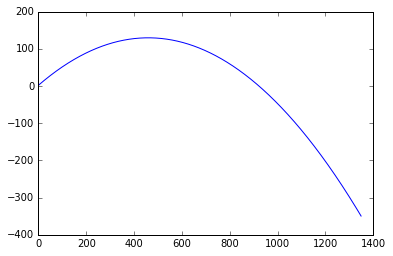

In [8]:
pylab.plot(p[:,0], p[:, 1])

But that doesn't look too great. Problem is our graph is showing lots of time after the rocket hits the ground.

Now we need to figure out how long the rocket will fly before hitting the ground. We can do that by solving that quadratic equation for the time when the `y` component of the position is 0.

The good old quadratic formula will do the trick.

$x = \frac {-b \pm \sqrt {b^2 - 4ac}}{2a}$

Let's write a function to solve the quadratic formula given arguments a, b, and c.

So we wrote a function to solve the quadratic equation and return the max.

In [11]:
def solve_quadratic(a, b, c):
    disc = b**2 - 4*a*c
    sqr_disc = np.sqrt(disc)
    plus = (-b + sqr_disc) / (2 * a)
    minus = (-b - sqr_disc) / (2 * a)
    return max(plus, minus)


Now we can get the time at which our missile will hit the ground by solving for Y = 0. I'm handing in the Y components of the coefficients because that is the dimension that will hit 0.

Below I see that with the given parameters, it will hit the ground at 10.24 seconds.

In [11]:
max_t = solve_quadratic(0.5 * A[1], V0[1], P0[1])
print(max_t)

10.24392605


Now copying and pasting from above but replacing the 15 seconds with max_t we get a better graph.

In [12]:
# time in steps of 0.01 seconds starting at 0 and going to max_t seconds.
t = np.arange(0, max_t, 0.01)

# I want a column vector. By that I mean a 2D object with N rows and 1 column. The function above gave me a 1D object with N elements.
# I'll use reshape. Note the use of -1. That is a signal for the function to figure out the number of rows given that there is 1 column.

t = np.reshape(t, (-1,1)) # I have to reshape t into a column vector

In [13]:
p = 0.5*A*t**2 + V0*t + P0

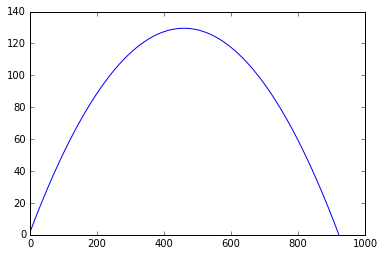

In [14]:
pylab.plot(p[:,0], p[:, 1])

Let's put it in a function so we don't have to cut and paste.

In [13]:
def shoot(A, V0, P0):
    max_t = solve_quadratic(0.5 * A[1], V0[1], P0[1])
    t = np.arange(0, max_t, 0.01)
    t = np.reshape(t, (-1,1))
    p = 0.5*A*t**2 + V0*t + P0
    return pylab.plot(p[:,0], p[:, 1])

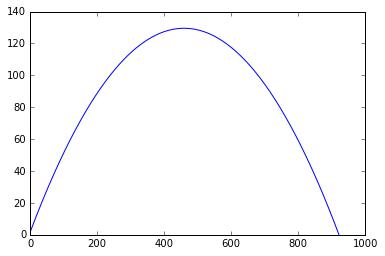

In [14]:
shoot(A, np.array([90, 50]), P0)

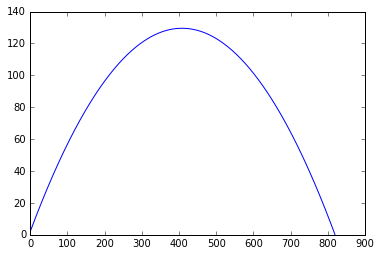

In [17]:
shoot(A, np.array([80, 50]), P0)

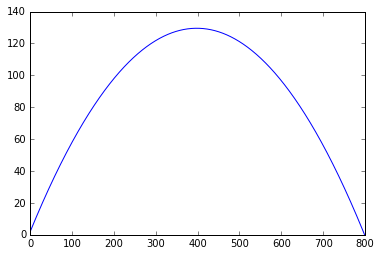

In [18]:
shoot(A, np.array([78, 50]), P0)

I can adjust all of the parameters.

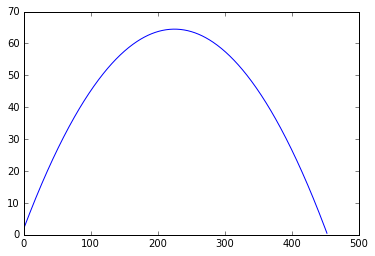

In [20]:
shoot(np.array([0, -20]), np.array([90, 50]), P0)